In [5]:
from empiricaldist import Pmf

In [6]:
coin = Pmf()

In [7]:
coin["head"] = 1/2
coin["tail"] = 1/2

In [8]:
coin

,probs
head,0.5
tail,0.5


In [9]:
die = Pmf.from_seq([1,2,3,4,5,6])

In [10]:
die

,probs
1,0.166667
2,0.166667
3,0.166667
4,0.166667
5,0.166667
6,0.166667


In [11]:
prior = Pmf.from_seq(["Bowl 1", "Bowl 2"])

In [12]:
prior

,probs
Bowl 1,0.5
Bowl 2,0.5


In [13]:
likelihood_vanila = [0.75, 0.5]
posterior = prior * likelihood_vanila
posterior

,probs
Bowl 1,0.375
Bowl 2,0.250


In [14]:
posterior.normalize()

0.625

In [15]:
posterior

,probs
Bowl 1,0.6
Bowl 2,0.4


In [16]:
import numpy as np
hypos = np.arange(101)

In [18]:
prior = Pmf(1, hypos)
prior

,probs
0,1
1,1
2,1
3,1
4,1
...,...
96,1
97,1
98,1
99,1


In [20]:
prior.normalize()
prior

,probs
0,0.009901
1,0.009901
2,0.009901
3,0.009901
4,0.009901
...,...
96,0.009901
97,0.009901
98,0.009901
99,0.009901


In [22]:
likelihood_vanila = hypos / 100
posterior_1 = prior * likelihood_vanila
posterior_1.normalize()
posterior_1

,probs
0,0.000000
1,0.000198
2,0.000396
3,0.000594
4,0.000792
...,...
96,0.019010
97,0.019208
98,0.019406
99,0.019604


In [23]:
from scipy.stats import binom

In [24]:
def make_binimial(n, p):
    ks = np.arange(n+1)
    ps = binom.pmf(ks, n, p)
    return Pmf(ps, ks)
pmf_k = make_binimial(n=250,p=0.5)

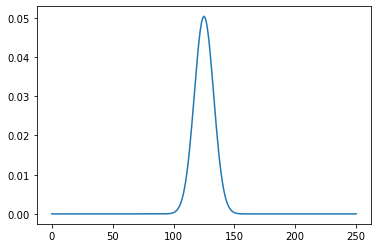

In [28]:
import matplotlib.pyplot as plt
plt.plot([i for i in range(len(pmf_k))], pmf_k)

In [29]:
def make_uniform(qs, name=None, **options):
    "균등분포를 만든다"
    pmf = Pmf(1.0, qs, **options)
    pmf.normalize()
    if name:
        pmf.index.name = name
    return pmf

In [30]:
qs = np.linspace(20,80,num=101)
prior_mu = make_uniform(qs, name="mu")
prior_mu

,probs
mu,
20.0,0.009901
20.6,0.009901
21.2,0.009901
21.8,0.009901
22.4,0.009901
...,...
77.6,0.009901
78.2,0.009901
78.8,0.009901


In [31]:
qs = np.linspace(5,30,num=101)
prior_sigma = make_uniform(qs, name="sigma")
prior_sigma

,probs
sigma,
5.00,0.009901
5.25,0.009901
5.50,0.009901
5.75,0.009901
6.00,0.009901
...,...
29.00,0.009901
29.25,0.009901
29.50,0.009901


In [38]:
def make_joint(pmf1, pmf2):
    import pandas as pd
    "두 pmf의 외적을 구한다"
    X, Y = np.meshgrid(pmf1,pmf2)
    return pd.DataFrame(X*Y, columns=pmf1.qs, index=pmf2.qs)

In [40]:
prior = make_joint(prior_mu, prior_sigma)
prior

,20.0,20.6,21.2,21.8,22.4,23.0,23.6,24.2,24.8,25.4,...,74.6,75.2,75.8,76.4,77.0,77.6,78.2,78.8,79.4,80.0
5.00,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,...,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098
5.25,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,...,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098
5.50,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,...,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098
5.75,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,...,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098
6.00,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,...,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29.00,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,...,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098
29.25,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,...,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098
29.50,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,...,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098
29.75,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,...,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098


In [77]:
import pandas as pd

df = pd.read_csv("data.csv", sep=',', index_col=None, skiprows=0)
df.head(3)

,Unnamed: 0,Treatment,Response
0,NaN,Treated,24
1,NaN,Treated,43
2,NaN,Treated,58


In [78]:
grouped = df.groupby("Treatment")
print(grouped)
responses = {}

for name, group in grouped:
    responses[name] = group["Response"]
print(responses)

{'Control': 21    42
22    43
23    55
24    26
25    62
26    37
27    33
28    41
29    19
30    54
31    20
32    85
33    46
34    10
35    17
36    60
37    53
38    42
39    37
40    42
41    55
42    28
43    48
Name: Response, dtype: int64, 'Treated': 0     24
1     43
2     58
3     71
4     43
5     49
6     61
7     44
8     67
9     49
10    53
11    56
12    59
13    52
14    62
15    54
16    57
17    33
18    46
19    43
20    57
Name: Response, dtype: int64}


In [81]:
data = responses["Control"]
mu_mesh, sigma_mesh, data_mesh = np.meshgrid(prior.columns, prior.index, data)

In [82]:
from scipy.stats import norm

densities = norm(mu_mesh, sigma_mesh).pdf(data_mesh)
densities.shapee

(101, 101, 23)

In [83]:
likelihood = densities.prod(axis=2)
likelihood.shape

(101, 101)

In [84]:
# 안녕하세요
# 손으로 그림을 못그려서
# 그림 그리는 봇을 만들어 볼게요

In [85]:
import torch
import torch.nn as nn

In [ ]:
class Generater(nn.Module):
    def __init__(self, n_classes, n_layers, )